# Projet "HighDef" : (BUT1 - SAE 22) #


**Frédéric Payan**


*3 juin 2025*


> Tarantino Ezio & Falcomer Matheo 

> goupe : 3A



## **Reprise et modification de la phase II et ajout de la phase III ci-dessous, la phase I n'a pas été retouchée.** ##

# Phase II

"AJS_short.flac" est un fichier audio HD. En effet, lorsque l'on va dans les proprietes de celui-ci ou sur les résultats du TP précédent, on peut obtenir la frequence d'echantillonage. La sienne est de 96000 Hz. Si on divise par 2, celle-ci est toujours superieur a 22050 Hz. Donc le fichier est de qualite HD. 

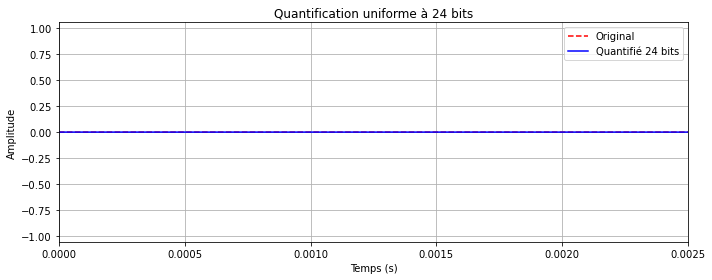

Nom du fichier : AJS_short.flac quantifie_save 24 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  2304000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 84.58118963900448 qui est donc de tres_bonne_qualite


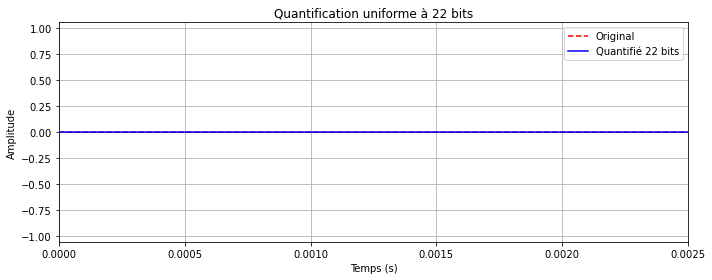

Nom du fichier : AJS_short.flac quantifie_save 22 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  2112000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 84.58140589721947 qui est donc de tres_bonne_qualite


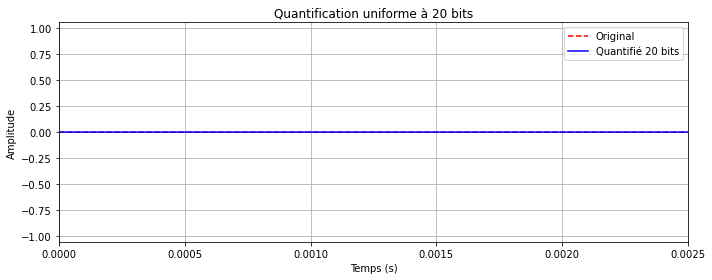

Nom du fichier : AJS_short.flac quantifie_save 20 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  1920000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 84.58030665835388 qui est donc de tres_bonne_qualite


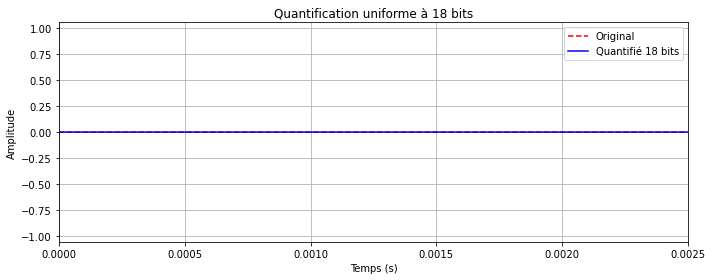

Nom du fichier : AJS_short.flac quantifie_save 18 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  1728000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 84.56483297874874 qui est donc de tres_bonne_qualite


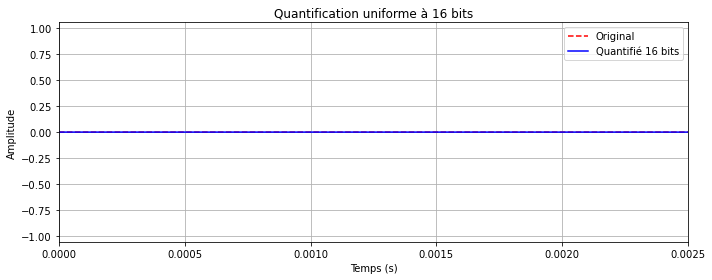

Nom du fichier : AJS_short.flac quantifie_save 16 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  1536000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 84.29851901074655 qui est donc de tres_bonne_qualite


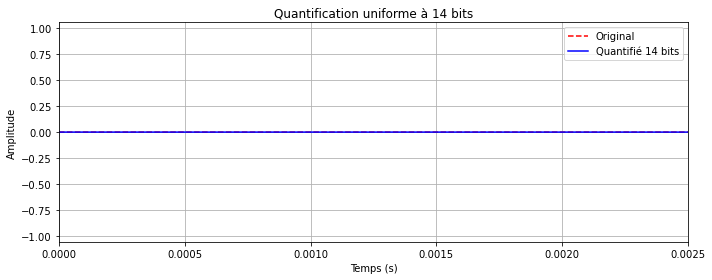

Nom du fichier : AJS_short.flac quantifie_save 14 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  1344000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 79.31810757696563 qui est donc de tres_bonne_qualite


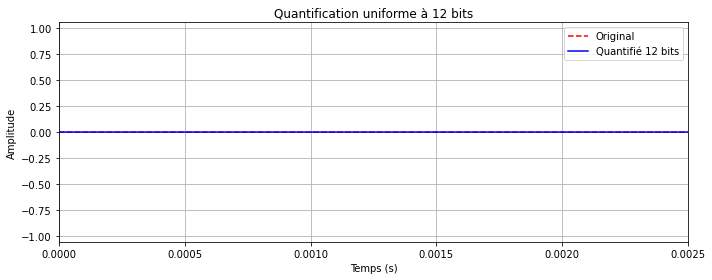

Nom du fichier : AJS_short.flac quantifie_save 12 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  1152000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 68.7779245339304 qui est donc de tres_bonne_qualite


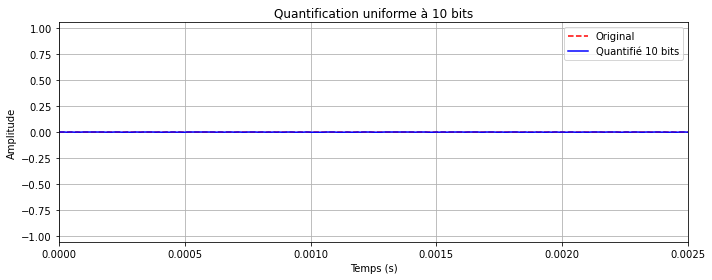

Nom du fichier : AJS_short.flac quantifie_save 10 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  960000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 56.82167364182724 qui est donc de tres_bonne_qualite


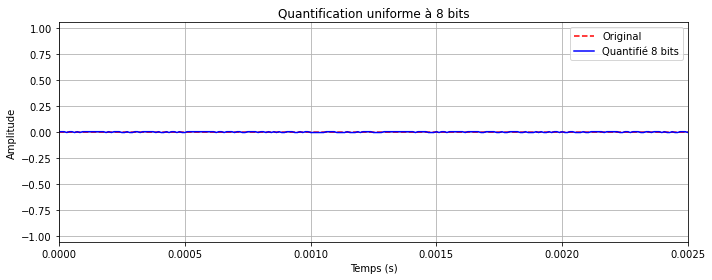

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  768000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 44.75678305077829 qui est donc de tres_bonne_qualite


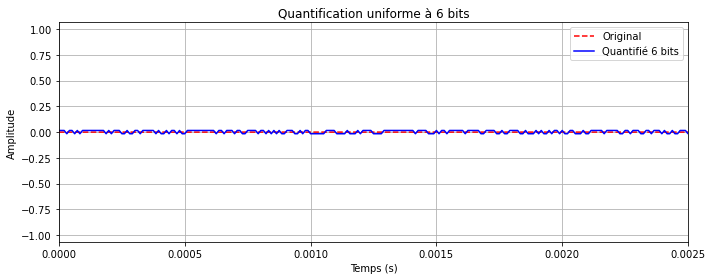

Nom du fichier : AJS_short.flac quantifie_save 6 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  576000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 32.60701693677956 qui est donc de bonne_qualite


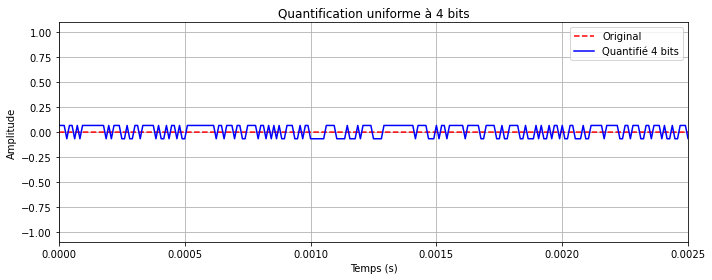

Nom du fichier : AJS_short.flac quantifie_save 4 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  384000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 20.132313287021862 qui est donc de moyenne_qualite


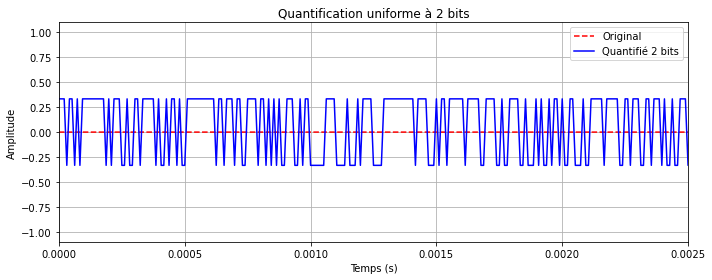

Nom du fichier : AJS_short.flac quantifie_save 2 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  192000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 4.597461660990922 qui est donc de mauvaise_qualite


In [6]:
from util_TP206_v2 import *     
from pylab import *            
from sounddevice import *      
from soundfile import *       
import numpy as np
import time
import soundfile as sf
from sounddevice import *
from pylab import *
import scipy.signal as sc 

def uniform_quantizer(s, niv, nmin, nmax):
    ''' quantification uniforme '''
    sq = empty(len(s))
    d = (nmax - nmin) / (niv - 1)
    for i in range(len(s)):
        if s[i] >= nmax: 
            sq[i] = nmax
        elif s[i] <= nmin:
            sq[i] = nmin
        else:
            if niv % 2 == 0:
                sq[i] = d * np.round((s[i] - d/2) / d) + (d/2)
            else:
                sq[i] = d * np.round(s[i] / d)
    return sq, d

fichier = "AJS_short.flac"
s, Fe = read(fichier)

# mono ou stéréo
if s.ndim == 1:
    audio_q = s
else:
    audio_q = s

Te = 1 / Fe
t = arange(0, len(audio_q) / Fe, Te)
t = t[:len(audio_q)]

nmin = -1
nmax = 1


for nbit in range(24, 1, -2):
    niv = 2 ** nbit
    
    #stereo
    if audio_q.ndim == 2:
        qg, _ = uniform_quantizer(audio_q[:, 0], niv, nmin, nmax)
        qd, _ = uniform_quantizer(audio_q[:, 1], niv, nmin, nmax)
        quantifie = np.column_stack((qg, qd))
        original = audio_q[:, 0] 
        quant_affiche = qg
    #mono
    else:
        quantifie, _ = uniform_quantizer(audio_q, niv, nmin, nmax)
        original = audio_q
        quant_affiche = quantifie

    #affichage graph
    figure(figsize=(10, 4))
    plot(t, original, 'r--', label='Original')
    plot(t, quant_affiche, 'b-', label=f'Quantifié {nbit} bits')
    title(f'Quantification uniforme à {nbit} bits')
    xlabel('Temps (s)')
    ylabel('Amplitude')
    xlim(0, 0.0025)
    grid()
    legend()
    tight_layout()
    show()

    #lecture du signal modif
    play(quantifie, samplerate=Fe)
    wait(2)

    #enregistrement du sig quantif pour utilisations de ces specifisitees 
    quantifie_save = f"quantifie_{nbit}bits.wav"
    sf.write(quantifie_save, quantifie, Fe)
    
    v1 = sf.info(quantifie_save)
    vq, fajs = sf.read(quantifie_save)
    nbea = fajs * nbit
    caa = v1.channels
    bita = v1.subtype
    
    Ps = norm(s,2)**2/len(s)
    erreur = norm((s-vq),2)**2/len(s)
    snr = 10*log10(Ps/erreur)
    
    if snr < 20 :
        qualite_snr = "mauvaise_qualite" 
    elif 20 <= snr <= 30 :
        qualite_snr = "moyenne_qualite" 
    elif 30 <= snr <= 40 :
        qualite_snr = "bonne_qualite"
    else: 
        qualite_snr = "tres_bonne_qualite"
        
    #ecriture des infos du signal
    print("Nom du fichier : AJS_short.flac quantifie_save", nbit, "bits")
    print("Frequence d'echantillonnage : ", fajs ,"Hz")
    print("Nombre de bits par echantillons : ", nbea ,"bits")
    print("Nombre de cannaux : ", caa )
    print("Nombre de bits utilises ", bita)
    print("Le rapport signal à bruit est de", snr, "qui est donc de", qualite_snr)

### Quelques explications : 

On commence à observer une dégradation importante du son lorsque nous avons un codage qui s'effectue a 6 bits. Les criteres que nous avons determines a cette quantifications sont les suivant et de la quantification uniforme du graphique : 

Nom du fichier : AJS_short.flac quantifie_save 6 bits
Frequence d'echantillonnage :  96000 Hz
Nombre de bits par echantillons :  576000 bits
Nombre de cannaux :  2
Nombre de bits utilises  PCM_16
Le rapport signal à bruit est de 32.60701693677956 qui est donc de bonne_qualite

Plus on dessent la quantification en terme de bits, plus les degradations sont importante, jusqu'a arriver a une quantification sur 2 bits ou le signal original est presque inaudible.

Nous pouvons entendre que le son transmis est donc nettement plus grave et modifie avec des gresillements intempestifs. Pour ce qui est de la qualite du son via le parametre snr nous avons dis que : en dessous de 20DB, le son est de mauvaise qualite, de 20DB a 30DB, il est de moyenne qualite, entre 30DB et 40DB le son est de bonne qualite et au dessus de 40 celui-ci est de tres bonne qualite. 

# Phase III

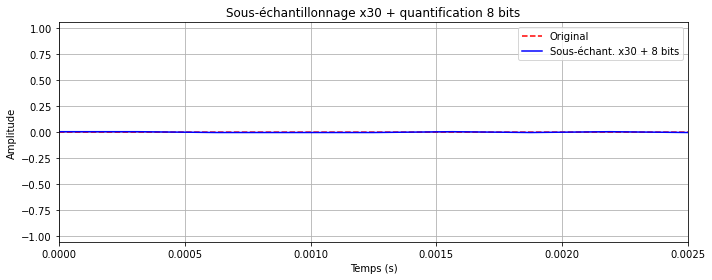

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 30
Frequence d'echantillonnage :  3200 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  571120
Le rapport signal à bruit est de -3.48 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.011


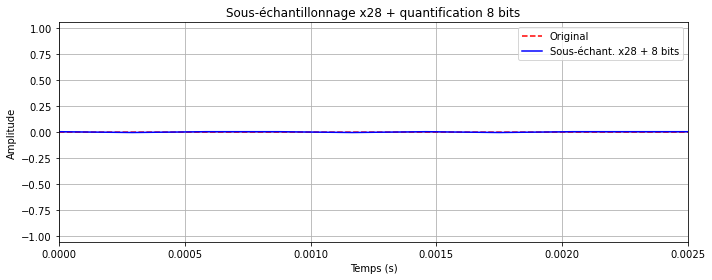

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 28
Frequence d'echantillonnage :  3428 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  611920
Le rapport signal à bruit est de -3.34 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.012


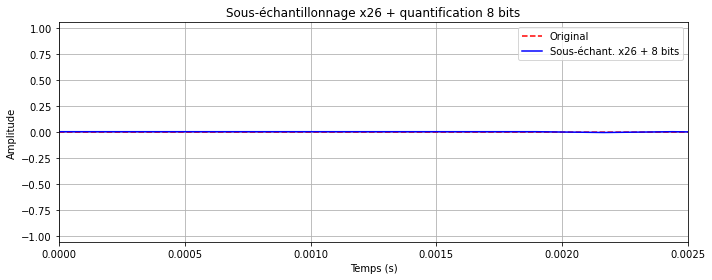

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 26
Frequence d'echantillonnage :  3692 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  658984
Le rapport signal à bruit est de -3.29 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.013


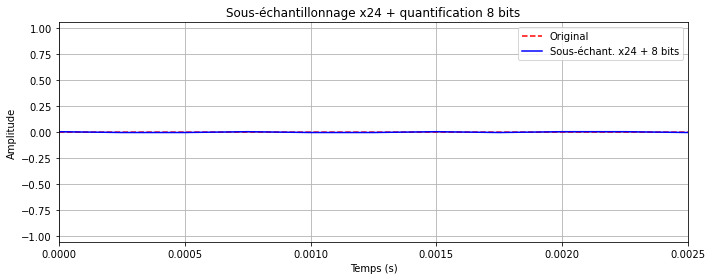

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 24
Frequence d'echantillonnage :  4000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  713904
Le rapport signal à bruit est de -3.4 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.014


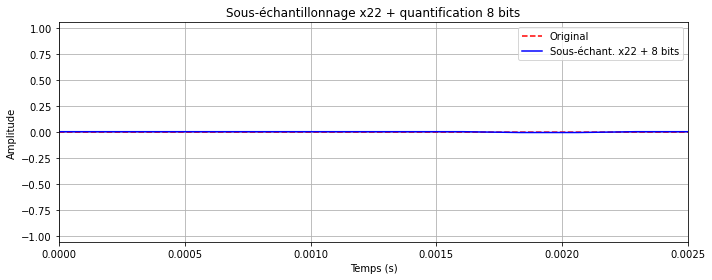

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 22
Frequence d'echantillonnage :  4363 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  778800
Le rapport signal à bruit est de -3.38 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.015


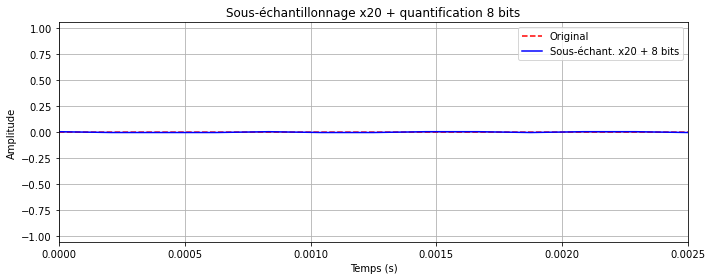

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 20
Frequence d'echantillonnage :  4800 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  856680
Le rapport signal à bruit est de -3.22 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.017


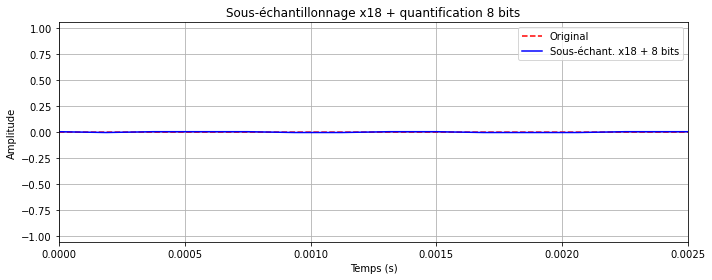

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 18
Frequence d'echantillonnage :  5333 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  951872
Le rapport signal à bruit est de -3.12 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.019


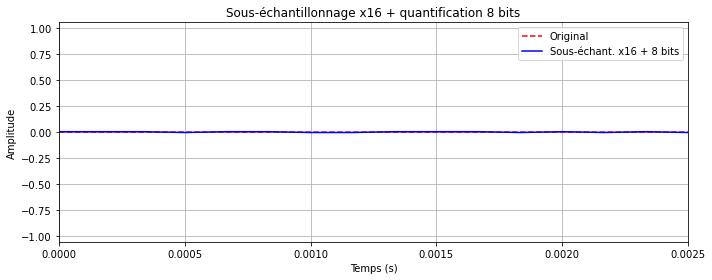

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 16
Frequence d'echantillonnage :  6000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  1070848
Le rapport signal à bruit est de -2.99 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.021


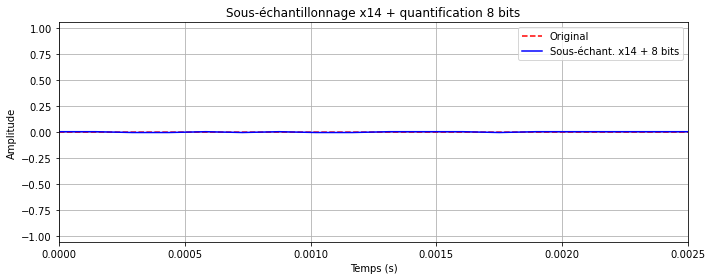

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 14
Frequence d'echantillonnage :  6857 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  1223832
Le rapport signal à bruit est de -3.1 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.024


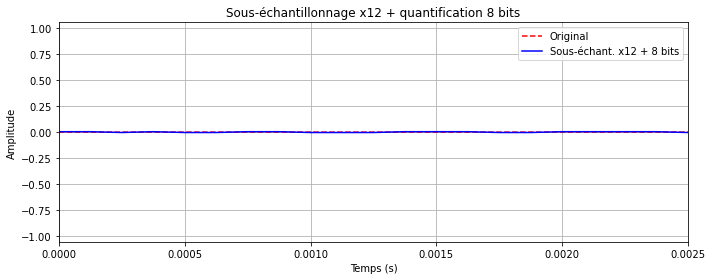

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 12
Frequence d'echantillonnage :  8000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  1427800
Le rapport signal à bruit est de -3.02 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.028


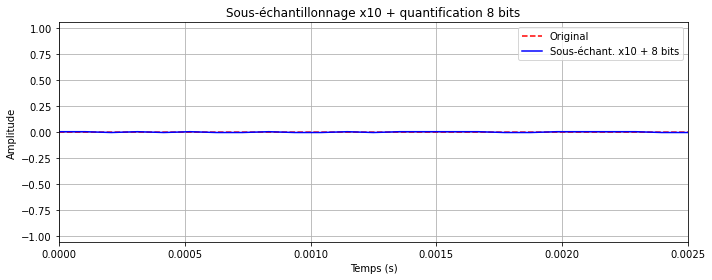

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 10
Frequence d'echantillonnage :  9600 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  1713360
Le rapport signal à bruit est de -3.15 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.033


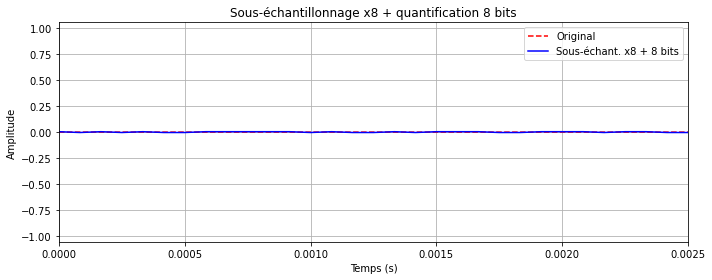

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 8
Frequence d'echantillonnage :  12000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  2141696
Le rapport signal à bruit est de -3.21 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.042


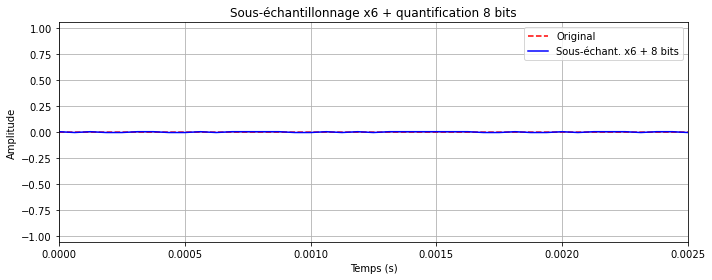

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 6
Frequence d'echantillonnage :  16000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  2855600
Le rapport signal à bruit est de -3.14 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.056


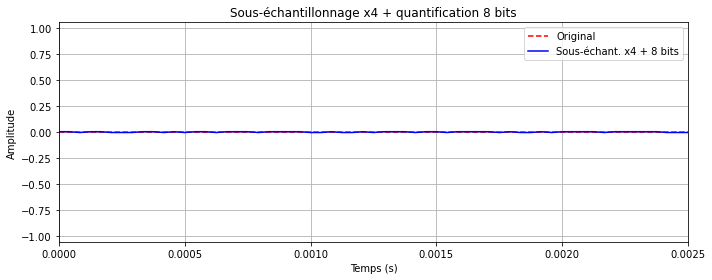

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 4
Frequence d'echantillonnage :  24000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  4283392
Le rapport signal à bruit est de -3.03 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.083


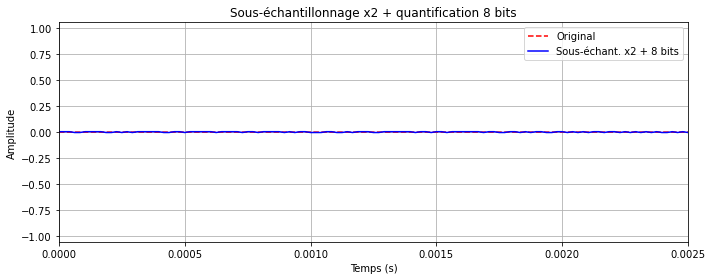

Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 2
Frequence d'echantillonnage :  48000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  8566784
Le rapport signal à bruit est de -3.24 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.167


In [5]:
from util_TP206_v2 import *     
from pylab import *            
from sounddevice import *      
from soundfile import *       
import numpy as np
import time
import soundfile as sf
from numpy.linalg import norm

def uniform_quantizer(s, niv, nmin, nmax):
    ''' quantification uniforme '''
    sq = empty(len(s))
    d = (nmax - nmin) / (niv - 1)
    for i in range(len(s)):
        if s[i] >= nmax: 
            sq[i] = nmax
        elif s[i] <= nmin:
            sq[i] = nmin
        else:
            sq[i] = d * round((s[i] - nmin) / d) + nmin
    return sq

fichier = "AJS_short.flac"
s, Fe = read(fichier)

if s.ndim == 1:
    audio = s
else:
    audio = s[:, 0]

Te = 1 / Fe
t = arange(0, len(audio) / Fe, Te)
t = t[:len(audio)] 

nbit = 8
niv = 2 ** nbit
nmin = -1
nmax = 1

for facteur in range(30, 1, -2):

    audio_ss = audio[::facteur]  
    Fe_ss = Fe // facteur        

    audio_q = uniform_quantizer(audio_ss, niv, nmin, nmax)

    Te_ss = 1 / Fe_ss
    t_ss = arange(0, len(audio_q) / Fe_ss, Te_ss)
    t_ss = t_ss[:len(audio_q)]

    figure(figsize=(10, 4))
    plot(t, audio, 'r--', label='Original')
    plot(t_ss, audio_q, 'b-', label=f'Sous-échant. x{facteur} + {nbit} bits')
    title(f'Sous-échantillonnage x{facteur} + quantification {nbit} bits')
    xlabel('Temps (s)')
    ylabel('Amplitude')
    xlim(0, 0.0025)
    grid()
    legend()
    tight_layout()
    show()

    play(audio_q, samplerate=Fe_ss)
    wait(2)

    long = min(len(audio), len(audio_q))
    Ps = norm(audio[:long], 2)**2 / long
    erreur = norm(audio[:long] - audio_q[:long], 2)**2 / long
    snr = 10 * log10(Ps / erreur)

    if snr < 20:
        qualite_snr = "mauvaise_qualite"
    elif 20 <= snr <= 30:
        qualite_snr = "moyenne_qualite"
    elif 30 < snr <= 40:
        qualite_snr = "bonne_qualite"
    else:
        qualite_snr = "tres_bonne_qualite"

    taille_hd = len(audio) * 24 
    taille_red = len(audio_q) * nbit
    compression = taille_red / taille_hd
    
    fajs = Fe_ss  
    nbea = nbit 
    caa = 1 
    bita = len(audio_q) * nbit

    print("Nom du fichier : AJS_short.flac quantifie_save", nbit, "bits")
    print("Facteur de sous-échantillonnage : x", facteur)
    print("Frequence d'echantillonnage : ", fajs, "Hz")
    print("Nombre de bits par echantillons : ", nbea, "bits")
    print("Nombre de cannaux : ", caa)
    print("Nombre de bits utilises ", bita)
    print("Le rapport signal à bruit est de", round(snr, 2), "dB qui est donc de", qualite_snr)
    print("Le taux de compression obtenu est de", round(compression, 3))


### Quelques explications : 

On entend que le son commence a etre mauvais quand on sous-echantillonne trop, par exemple a partir du facteur 12. Le son devient plus grave et moins net.
Voila les resultats pour un facteur 12 et une quantification a 8 bits :
Nom du fichier : AJS_short.flac quantifie_save 8 bits
Facteur de sous-échantillonnage : x 12
Frequence d'echantillonnage :  8000 Hz
Nombre de bits par echantillons :  8 bits
Nombre de cannaux :  1
Nombre de bits utilises  1427800
Le rapport signal à bruit est de -3.02 dB qui est donc de mauvaise_qualite
Le taux de compression obtenu est de 0.028
Plus on augmente le facteur de sous-echantillonnage, plus la qualite baisse. A partir de 16, le son est tres degrade avec des bruits bizarres.
Le meilleur compromis est un facteur autour de 8 a 10 avec 8 bits, ca garde une bonne qualite et reduit bien la taille du fichier.